In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print(df.shape)
print(df.info())
df.describe()

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


# Data Exploration
Now we can plot the distribution of data wrt dependent variable i.e HeartDisease

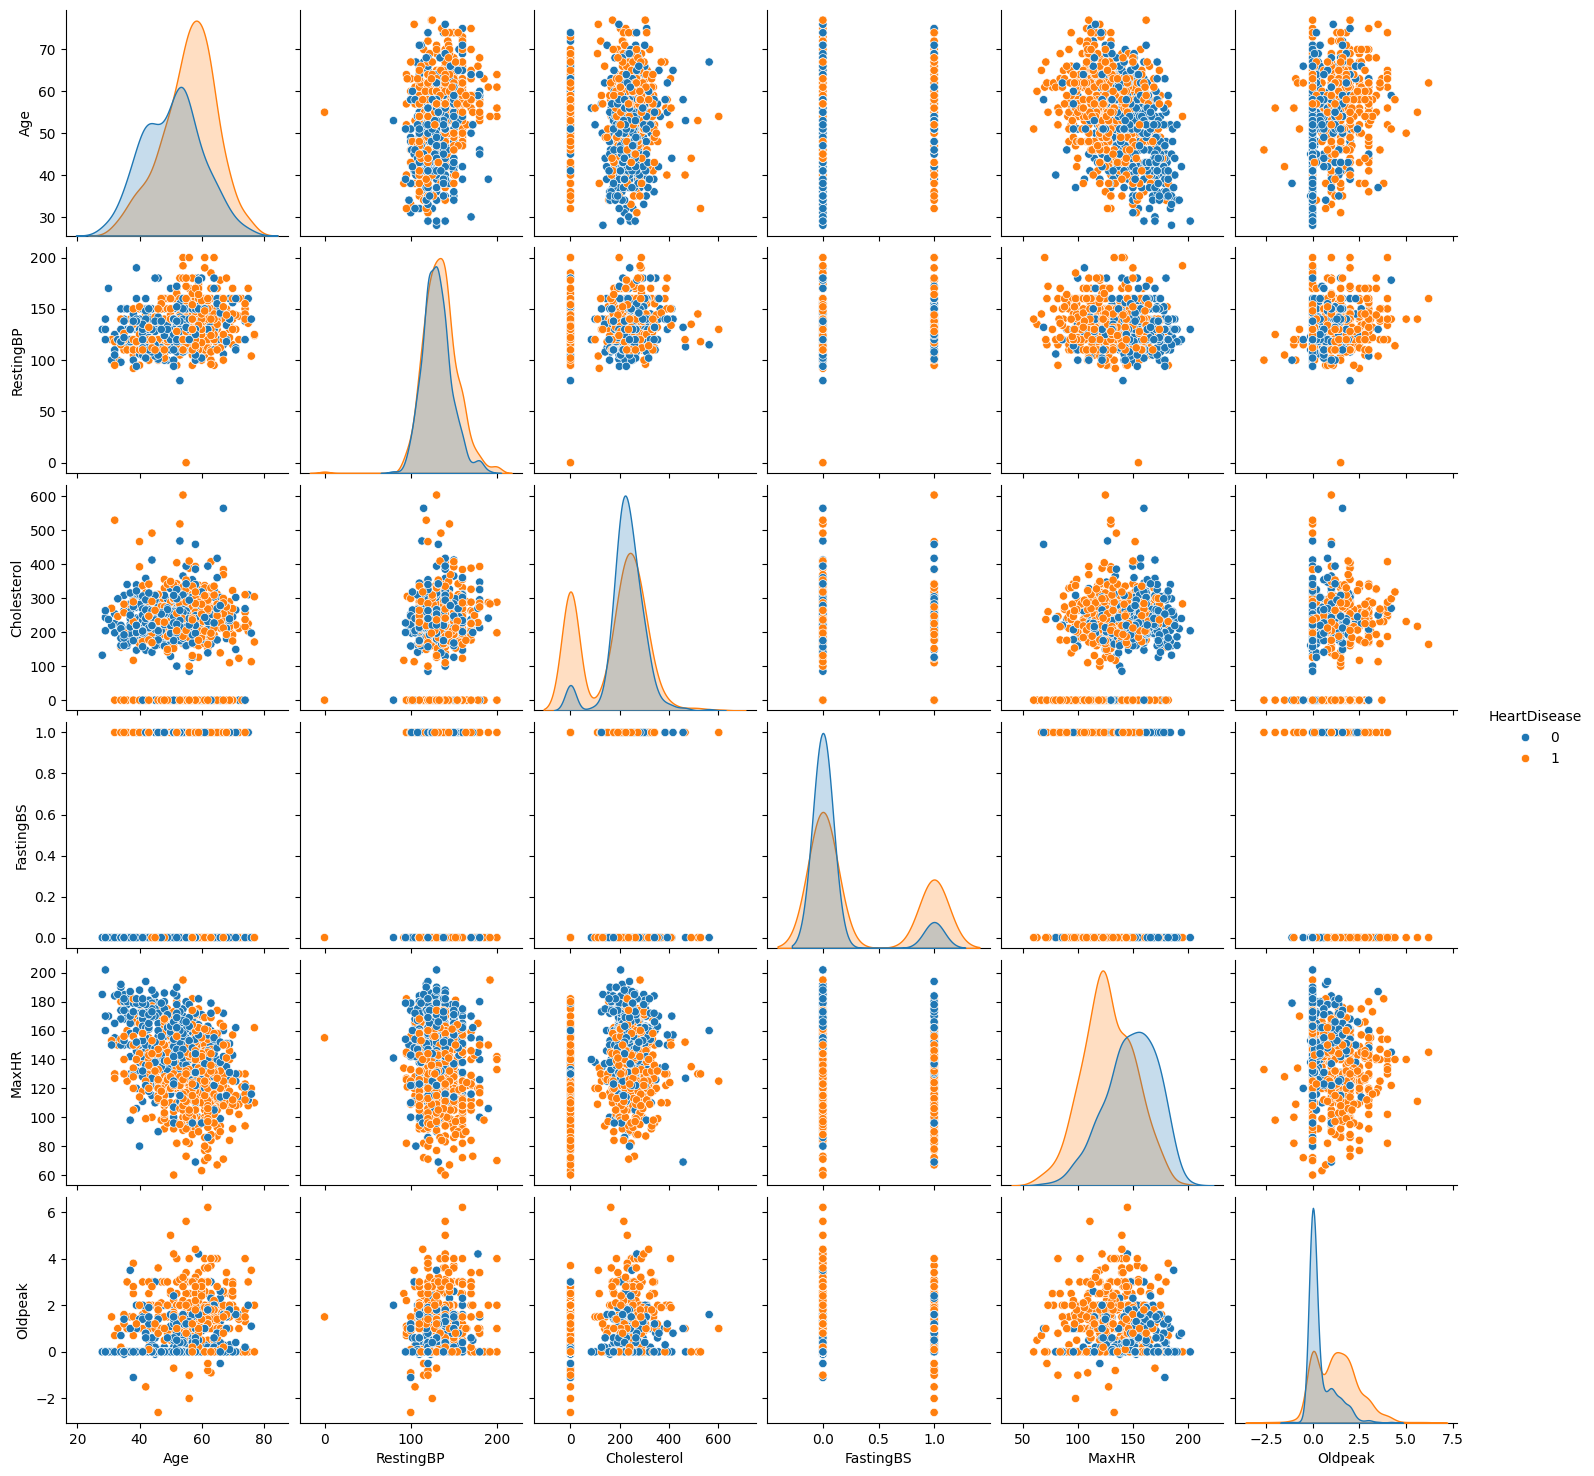

In [6]:
sns.pairplot(df,hue='HeartDisease')

<ipython-input-7-4170304790>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age", data=df, palette="Set3")


Text(0.5, 1.0, 'Age Distribution')

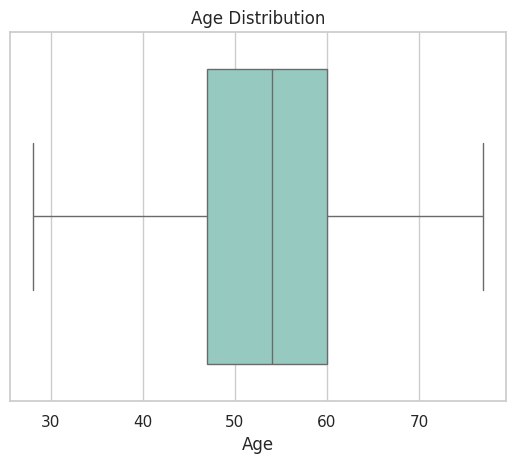

In [7]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Age", data=df, palette="Set3")
plt.title("Age Distribution")

<ipython-input-8-4283695574>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

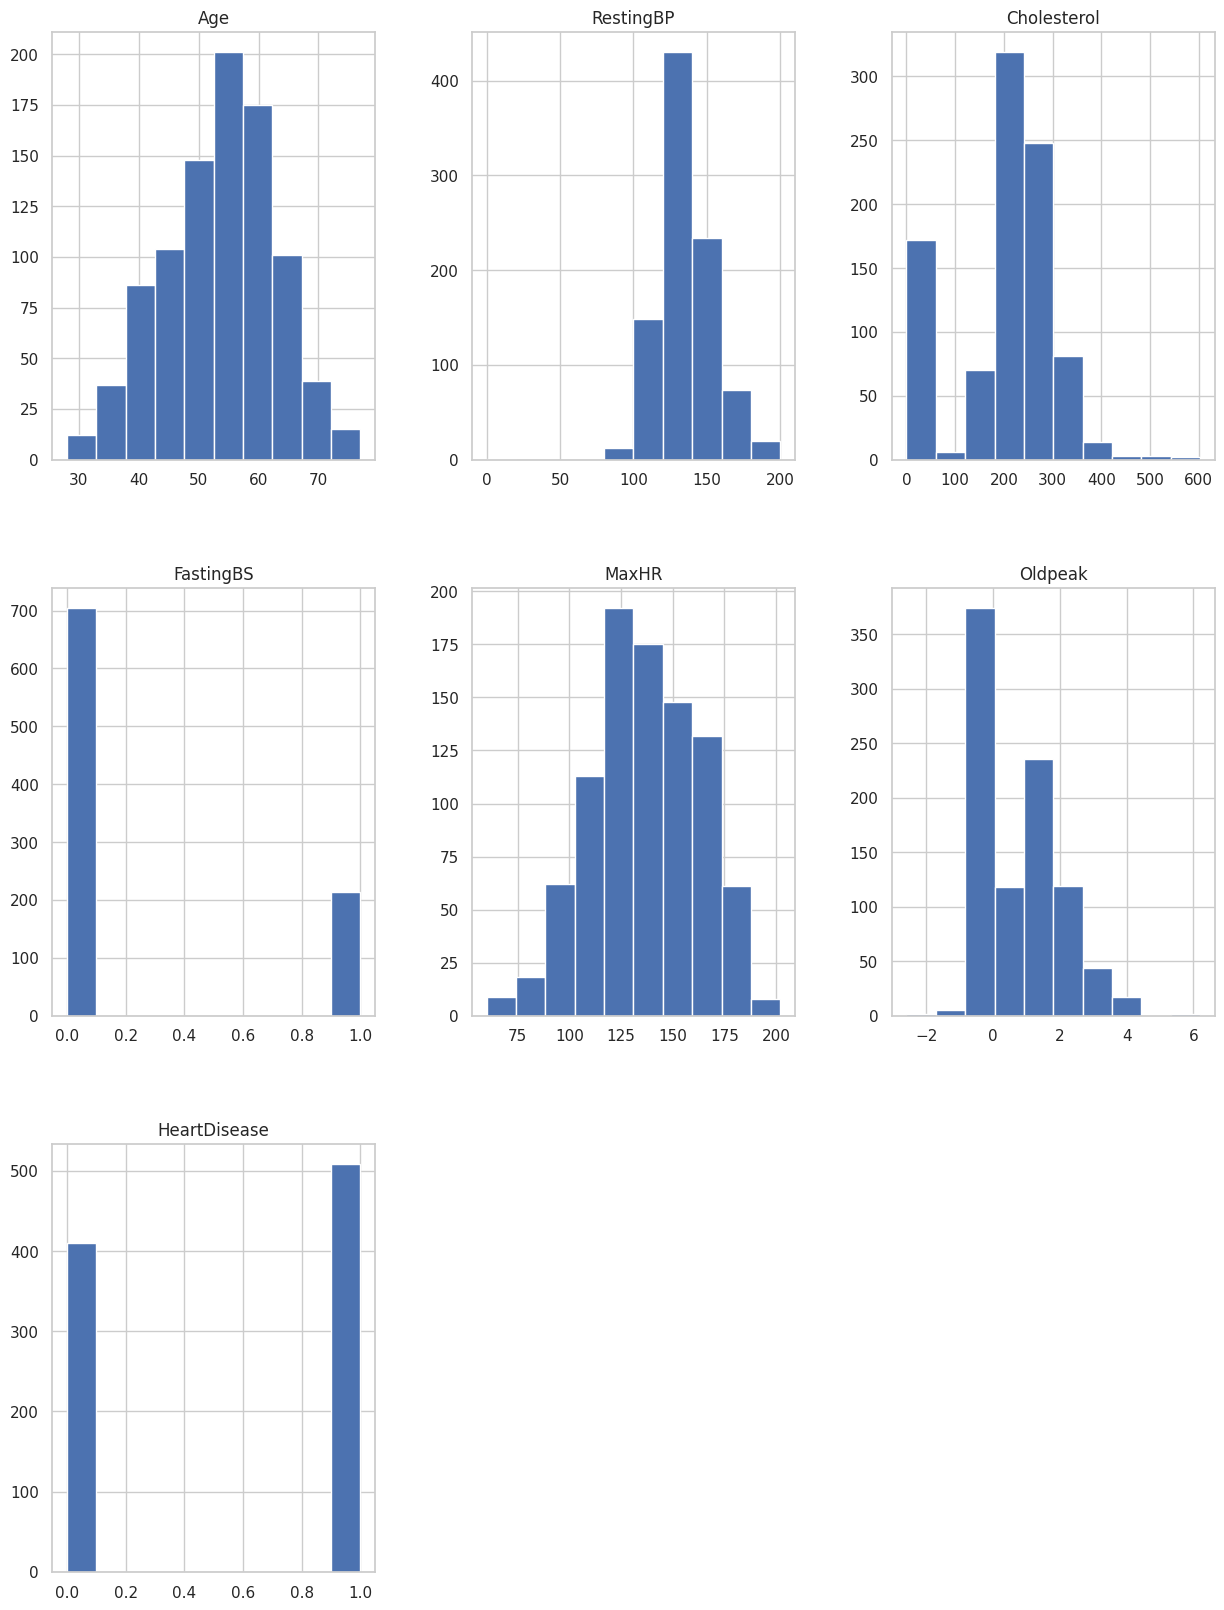

In [8]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

Text(0.5, 1.0, 'Heart Diseases')

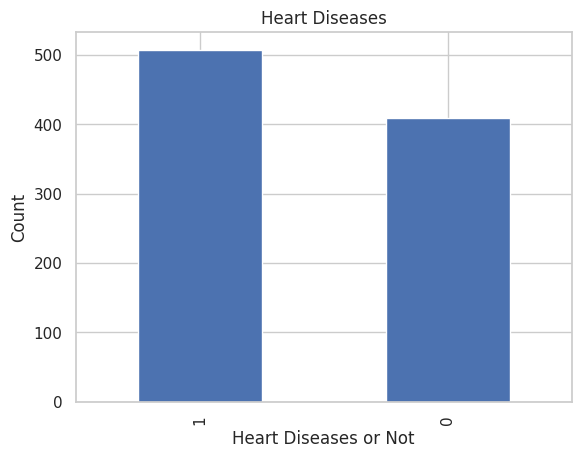

In [9]:
df.HeartDisease.value_counts().plot(kind='bar')
plt.xlabel("Heart Diseases or Not")
plt.ylabel("Count")
plt.title("Heart Diseases")

## Data Preprocessing

In [10]:
cat = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [11]:
df[cat]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[cat] = df[cat].apply(lb.fit_transform)

In [13]:
df[cat]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


In [14]:
X=df.drop('HeartDisease',axis=1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [15]:
y=df['HeartDisease']
y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [17]:
X_train.shape

(734, 11)

In [18]:
from sklearn.preprocessing import QuantileTransformer
scaler=QuantileTransformer()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


# Transform features using quantiles information.

# This method transforms the features to follow a uniform or a normal distribution.
# Therefore, for a given feature, this transformation tends to spread out the most frequent values.
# It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

# The transformation is applied on each feature independently. First an estimate of the cumulative distribution
# function of a feature is used to map the original values to a uniform distribution. The obtained values are then
# mapped to the desired output distribution using the associated quantile function. Features values of new/unseen
# data that fall below or above the fitted range will be mapped to the bounds of the output distribution.
# Note that this transform is non-linear. It may distort linear correlations between variables measured at the
# same scale but renders variables measured at different scales more directly comparable

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (734). n_quantiles is set to n_samples.
  warnings.warn(


In [19]:
X_train[0]

array([0.96998636, 1.        , 0.        , 0.7005457 , 0.        ,
       1.        , 0.49931787, 0.75443383, 1.        , 0.85129604,
       0.31855389])

# Using KNN
K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −

Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

In [20]:
from sklearn.neighbors import KNeighborsClassifier


In [21]:
knn=KNeighborsClassifier(n_neighbors=4,metric='euclidean',p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4, p=1)

In [22]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1])

In [23]:
knn.score(X_test,y_test)

0.8478260869565217

In [24]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [25]:
metrics.accuracy_score(y_test,y_pred)

0.8478260869565217

In [26]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
mat

array([[68,  9],
       [19, 88]])

In [27]:
from sklearn.metrics import classification_report
target_names = ['Heart Diseases', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Heart Diseases       0.78      0.88      0.83        77
        Normal       0.91      0.82      0.86       107

      accuracy                           0.85       184
     macro avg       0.84      0.85      0.85       184
  weighted avg       0.85      0.85      0.85       184



To select optimize k value we will use elbow method

In [28]:
#For selecting K value
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

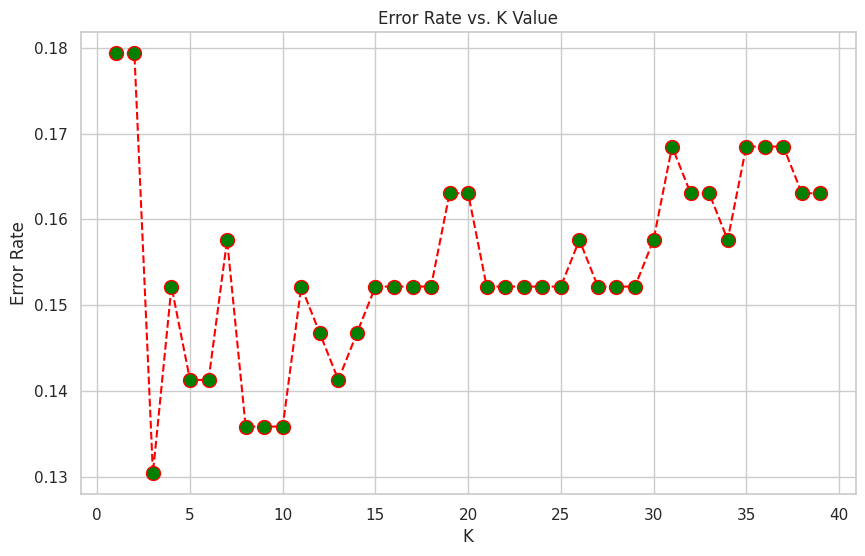

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
#From graph we can see that optimize k value is 16,17,18
# Now we will train our KNN classifier with this k values

knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [31]:
knn.score(X_test,y_test)

0.8695652173913043

<Axes: >

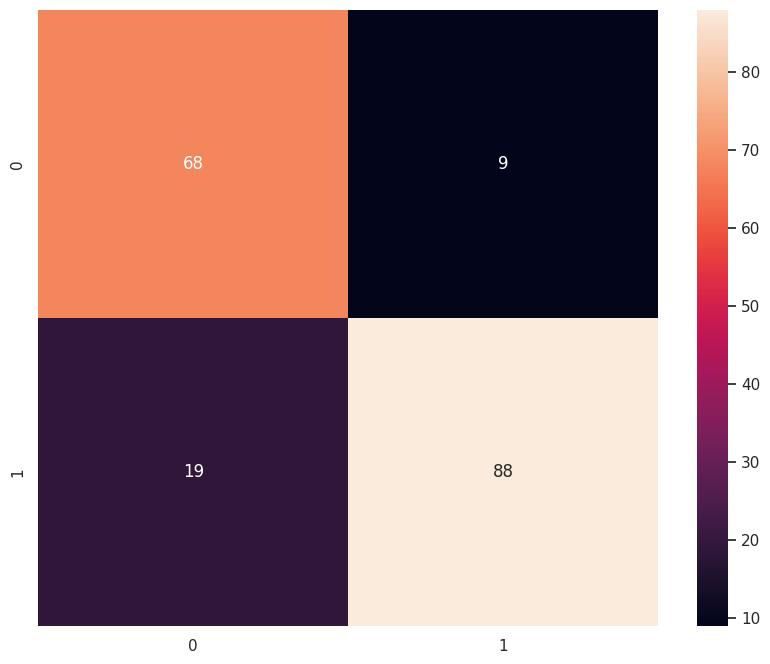

In [32]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

In [33]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.78      0.88      0.83        77
      Normal       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



## Using H2o.ai AutoML

In [34]:
!pip install h2o

In [35]:
import h2o
# We will be using default parameter Here with H2O init method
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsmktx040
  JVM stdout: /tmp/tmpsmktx040/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsmktx040/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,09 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 22 days
H2O_cluster_name:,H2O_from_python_unknownUser_zdh7tx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Covert to H2O Data frame

In [36]:
hf = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [37]:
# Data Transform - Split train : test datasets
train, valid = hf.split_frame(ratios = [.80], seed = 1234)
print("Training Dataset", train.shape)
print("Validation Dataset", valid.shape)

Training Dataset (737, 12)
Validation Dataset (181, 12)


In [38]:
train.head(5)

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
40,1,1,140,289,0,1,172,0,0,2,0
49,0,2,160,180,0,1,156,0,1,1,1
37,1,1,130,283,0,2,98,0,0,2,0
54,1,2,150,195,0,1,122,0,0,2,0
39,1,2,120,339,0,1,170,0,0,2,0


In [39]:
valid.head()


Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
48,0,0,138,214,0,1,108,1,1.5,1,1
48,0,1,120,284,0,1,120,0,0,2,0
42,0,2,115,211,0,2,137,0,0,2,0
43,0,1,120,201,0,1,165,0,0,2,0
60,1,0,100,248,0,1,125,0,1,1,1
36,1,1,120,267,0,1,160,0,3,1,1
43,0,3,100,223,0,1,142,0,0,2,0
44,1,1,120,184,0,1,142,0,1,1,0
53,1,0,124,260,0,2,112,1,3,1,0
51,1,1,125,188,0,1,145,0,0,2,0


In [40]:
# Identify predictors and response
featureColumns = train.columns
targetColumn   = "HeartDisease"
featureColumns.remove(targetColumn)

###AutoML does all of this automatically:

✅ Data preprocessing (handles missing values, encoding, etc.)

✅ Tries many ML algorithms (like:

Gradient Boosting Machine (GBM)

XGBoost

Random Forest (DRF)

Generalized Linear Model (GLM)

Deep Learning (Neural Nets)

And combines them using Stacked Ensemble)

✅ Tunes hyperparameters (e.g., number of trees, learning rate)

✅ Evaluates each model using the validation_frame you provided

✅ Ranks all models in a leaderboard, from best to worst

✅ Selects the best model for predictions

In [41]:
import time
from h2o.automl import H2OAutoML


aml = H2OAutoML(max_models=12,         # Train up to 12 different models
                seed=1234,             # Set random seed for reproducibility
                balance_classes=True   # Automatically balance classes if dataset is imbalanced
               )


aml.train(x=featureColumns,            # List of input feature column names
          y=targetColumn,              # Target/output column to predict (e.g., 'Class')
          training_frame=train,        # Training dataset (used to train models)
          validation_frame=valid)      # Validation dataset (used to evaluate model performance during training)


AutoML progress: |
17:19:28.67: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
17:19:28.267: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
17:19:38.910: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


17:19:40.905: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
17:19

key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/12
# GBM base models (used / total),5/5
# XGBoost base models (used / total),2/4
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


### Get the full leaderboard of all models trained by AutoML

In [42]:

lb = aml.leaderboard  # 'lb' now holds a ranked list of all models based on performance

# Print the entire leaderboard (all rows)
print(lb.head(rows = lb.nrows))  # Shows all models with their metrics like AUC, RMSE, logloss, etc.




model_id                                                     rmse        mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20250618_171927     0.315383  0.0994663  0.213922  0.221226                 0.0994663
GBM_2_AutoML_1_20250618_171927                           0.315879  0.0997797  0.212289  0.221475                 0.0997797
StackedEnsemble_BestOfFamily_1_AutoML_1_20250618_171927  0.316338  0.10007    0.213542  0.221688                 0.10007
GBM_4_AutoML_1_20250618_171927                           0.317316  0.10069    0.216858  0.223157                 0.10069
GBM_3_AutoML_1_20250618_171927                           0.318245  0.10128    0.221264  0.223482                 0.10128
DRF_1_AutoML_1_20250618_171927                           0.320722  0.102863   0.214098  0.22421                  0.102863
GBM_5_AutoML_1_20250618_171927                           0.325684  0.10607    0.217575  0.227521                 0.10607
GBM_1_AutoML_1_20250618_1

#### Generate detailed model explanation using validation data

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20250618_171927,0.310785,0.0965874,0.208116,0.22025,0.0965874,1479,0.252856,StackedEnsemble
DRF_1_AutoML_1_20250618_171927,0.312383,0.0975831,0.201239,0.221018,0.0975831,590,0.046471,DRF
GBM_4_AutoML_1_20250618_171927,0.312774,0.0978273,0.212321,0.222524,0.0978273,274,0.027931,GBM
GBM_3_AutoML_1_20250618_171927,0.313277,0.0981428,0.214793,0.22195,0.0981428,451,0.023644,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20250618_171927,0.314039,0.0986207,0.206585,0.222412,0.0986207,1489,0.103773,StackedEnsemble
GBM_5_AutoML_1_20250618_171927,0.316996,0.100486,0.215259,0.225841,0.100486,221,0.017739,GBM
GBM_2_AutoML_1_20250618_171927,0.321325,0.10325,0.211491,0.226844,0.10325,405,0.020613,GBM
GBM_1_AutoML_1_20250618_171927,0.324918,0.105572,0.234617,0.2286,0.105572,460,0.019738,GBM
XGBoost_grid_1_AutoML_1_20250618_171927_model_1,0.333885,0.111479,0.235307,0.2403,0.111479,552,0.008856,XGBoost
XRT_1_AutoML_1_20250618_171927,0.334748,0.112056,0.258259,0.238366,0.112056,542,0.01867,DRF


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

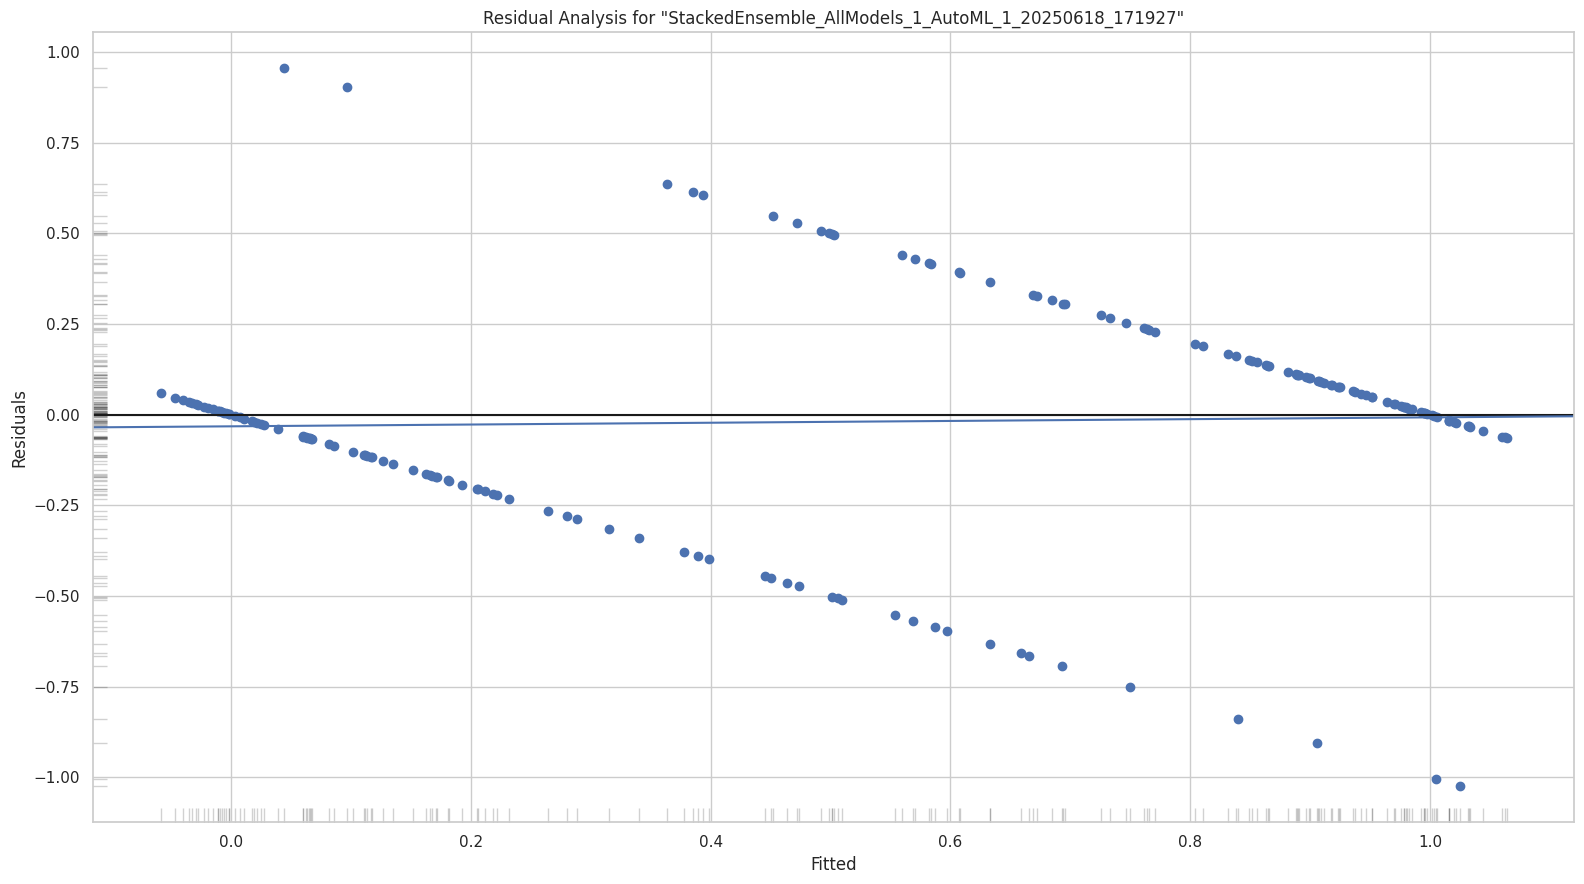

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

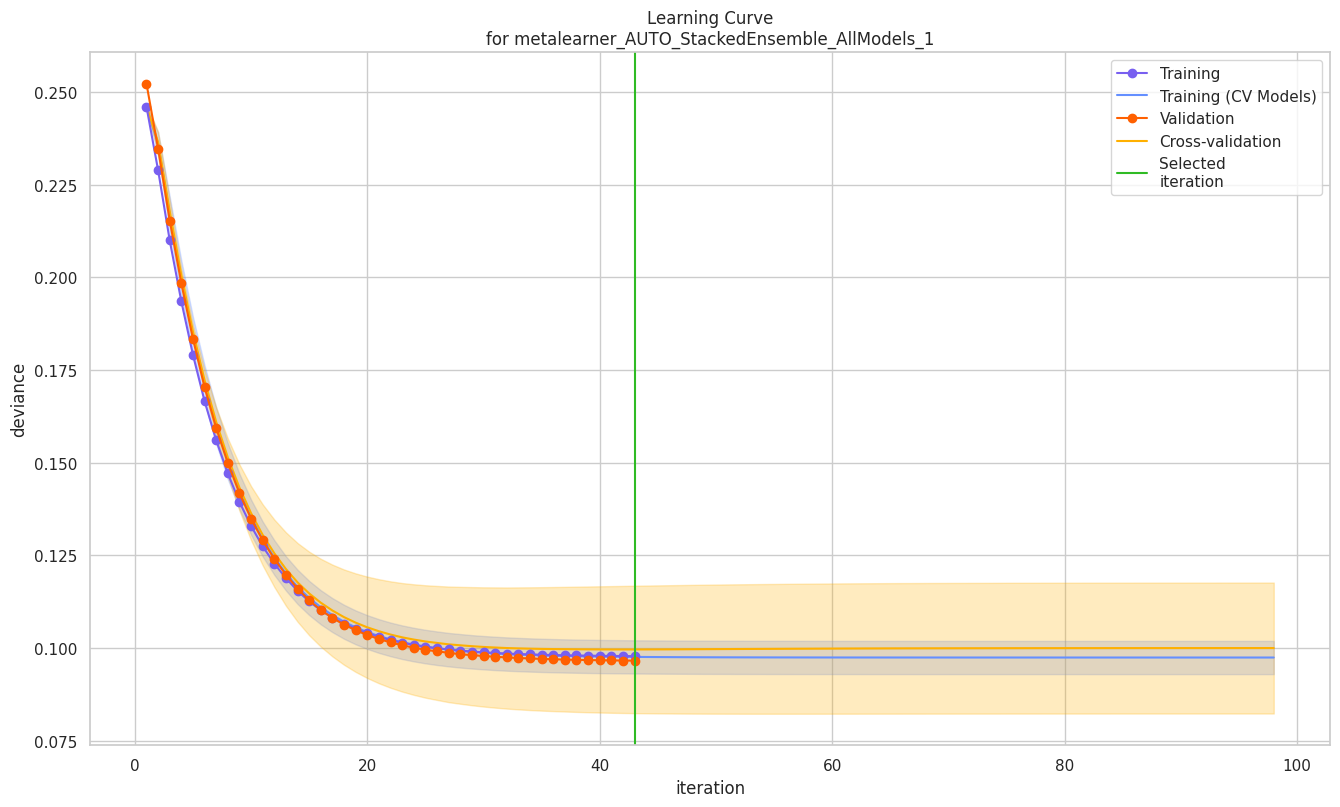

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

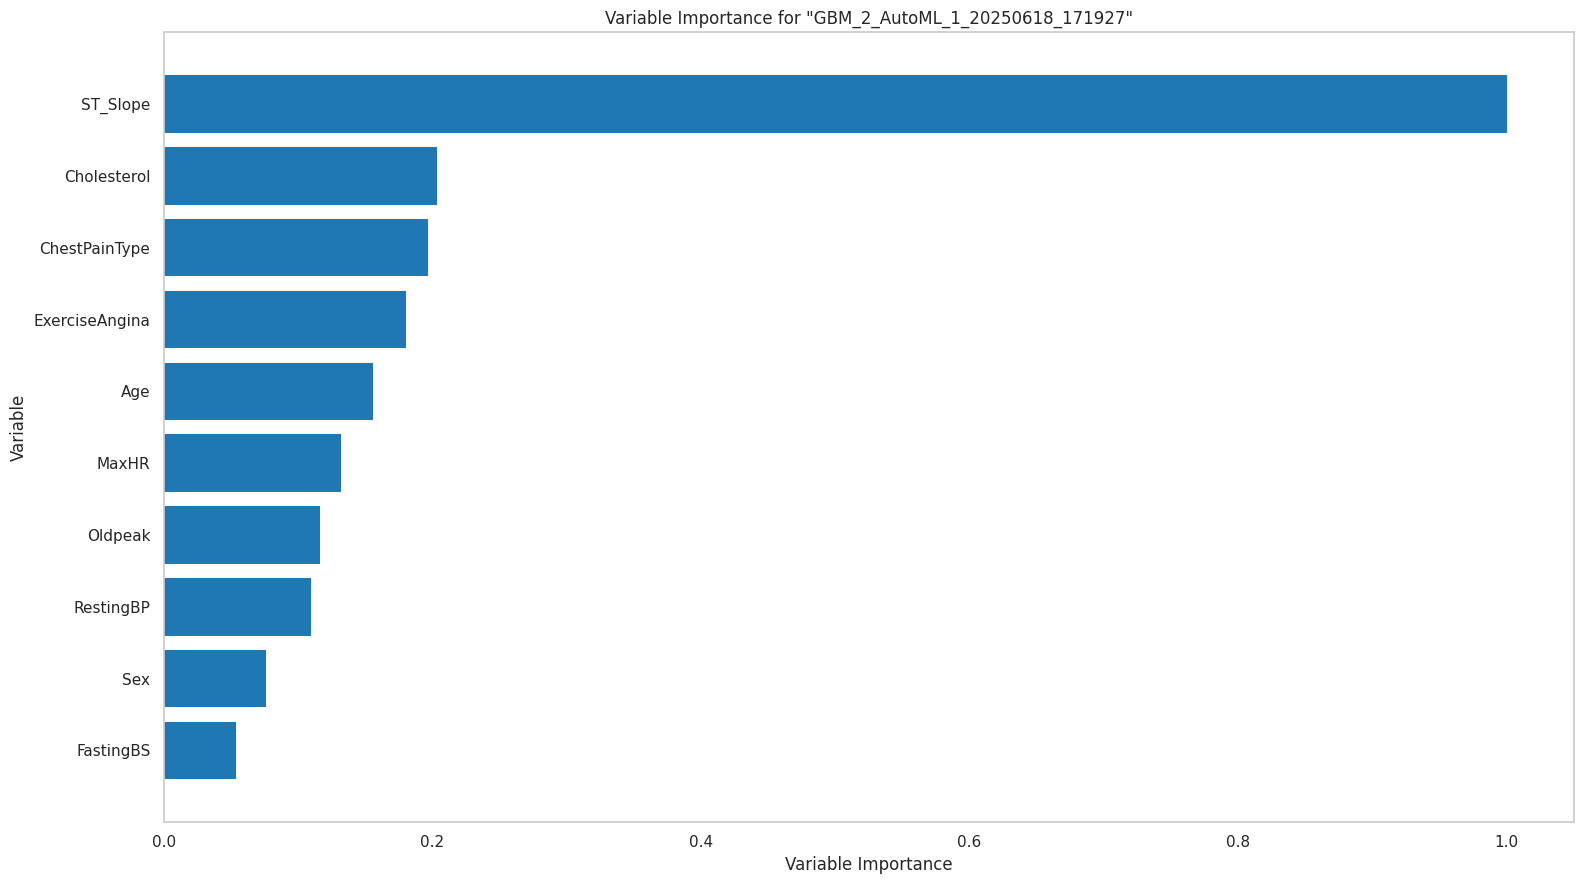

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

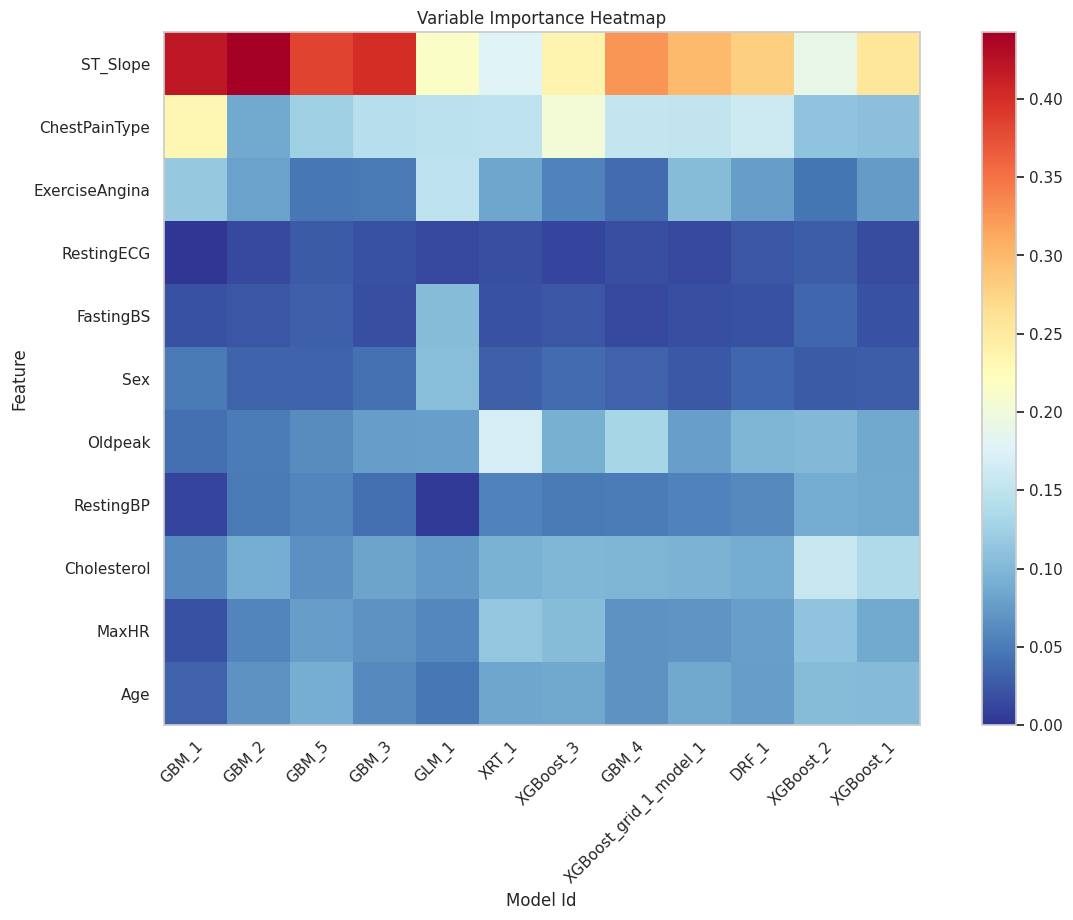

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

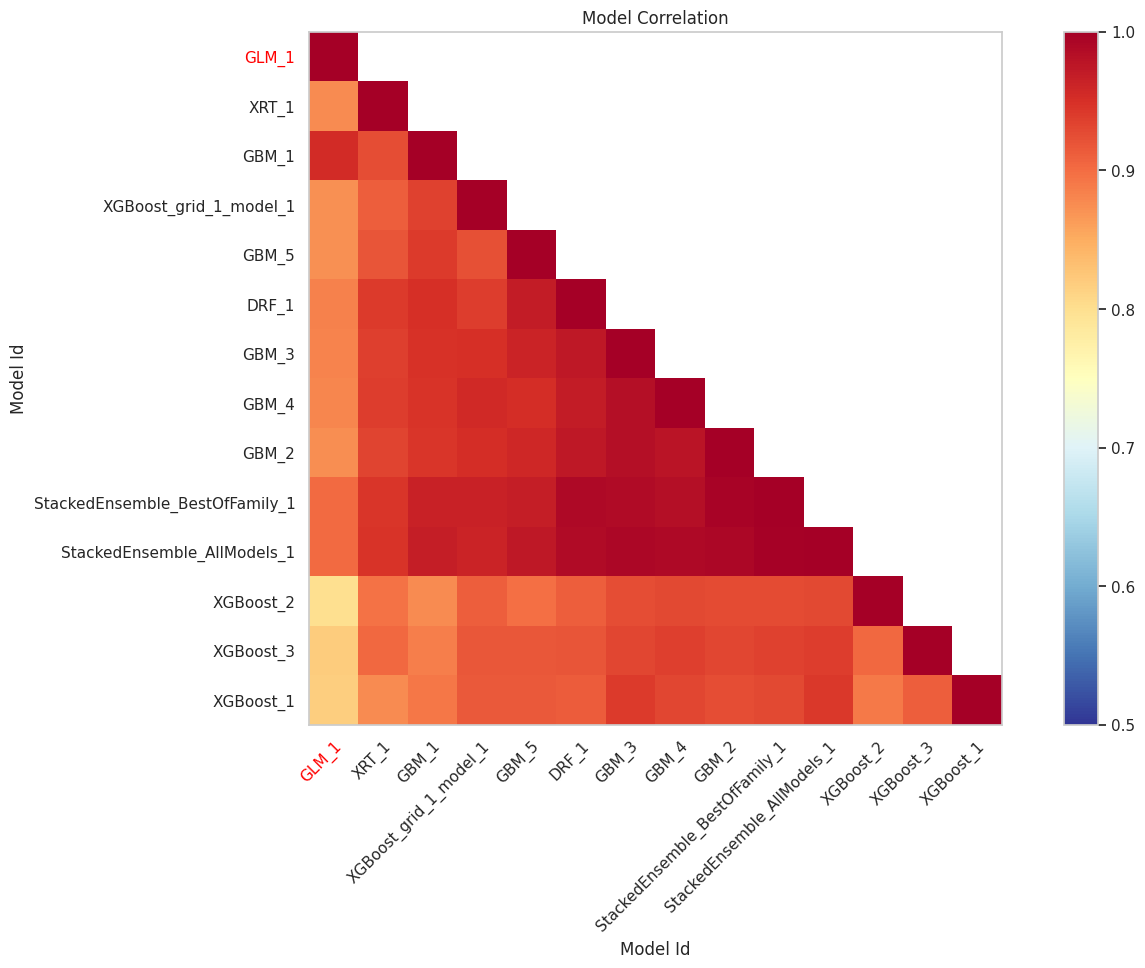

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

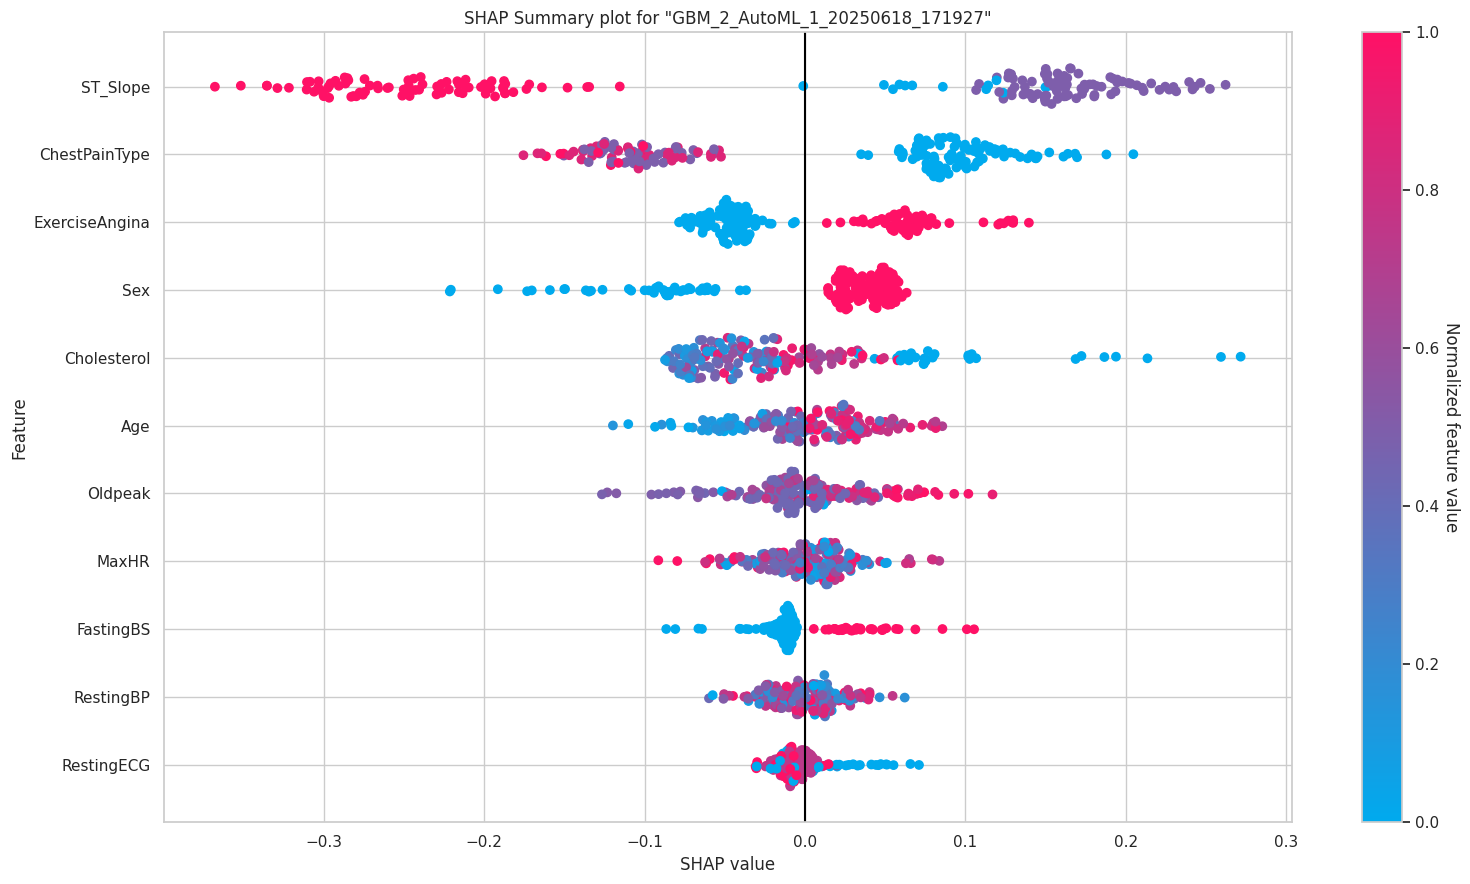

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

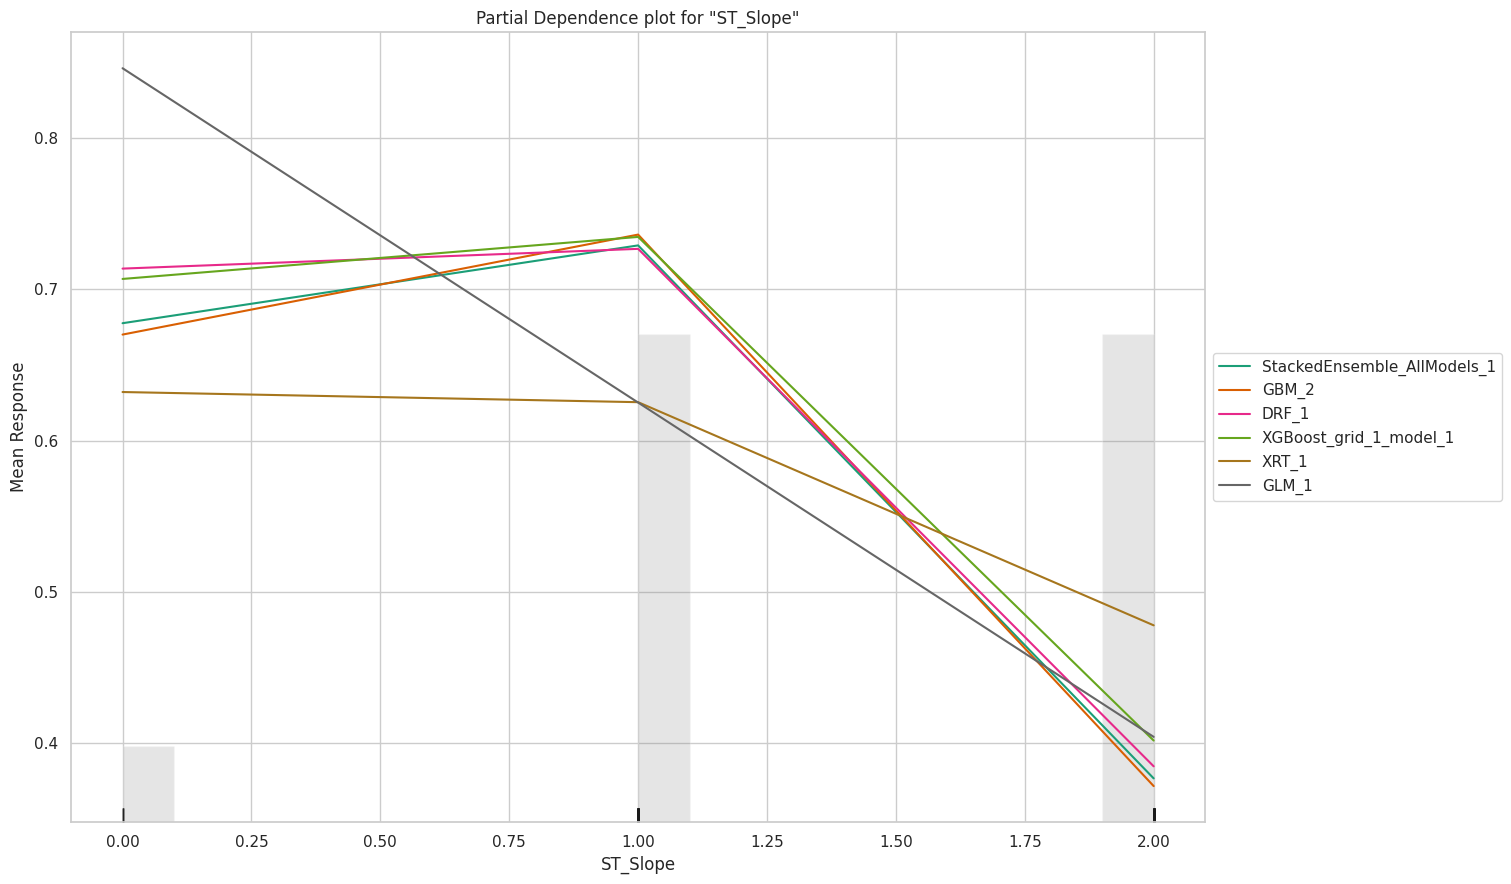

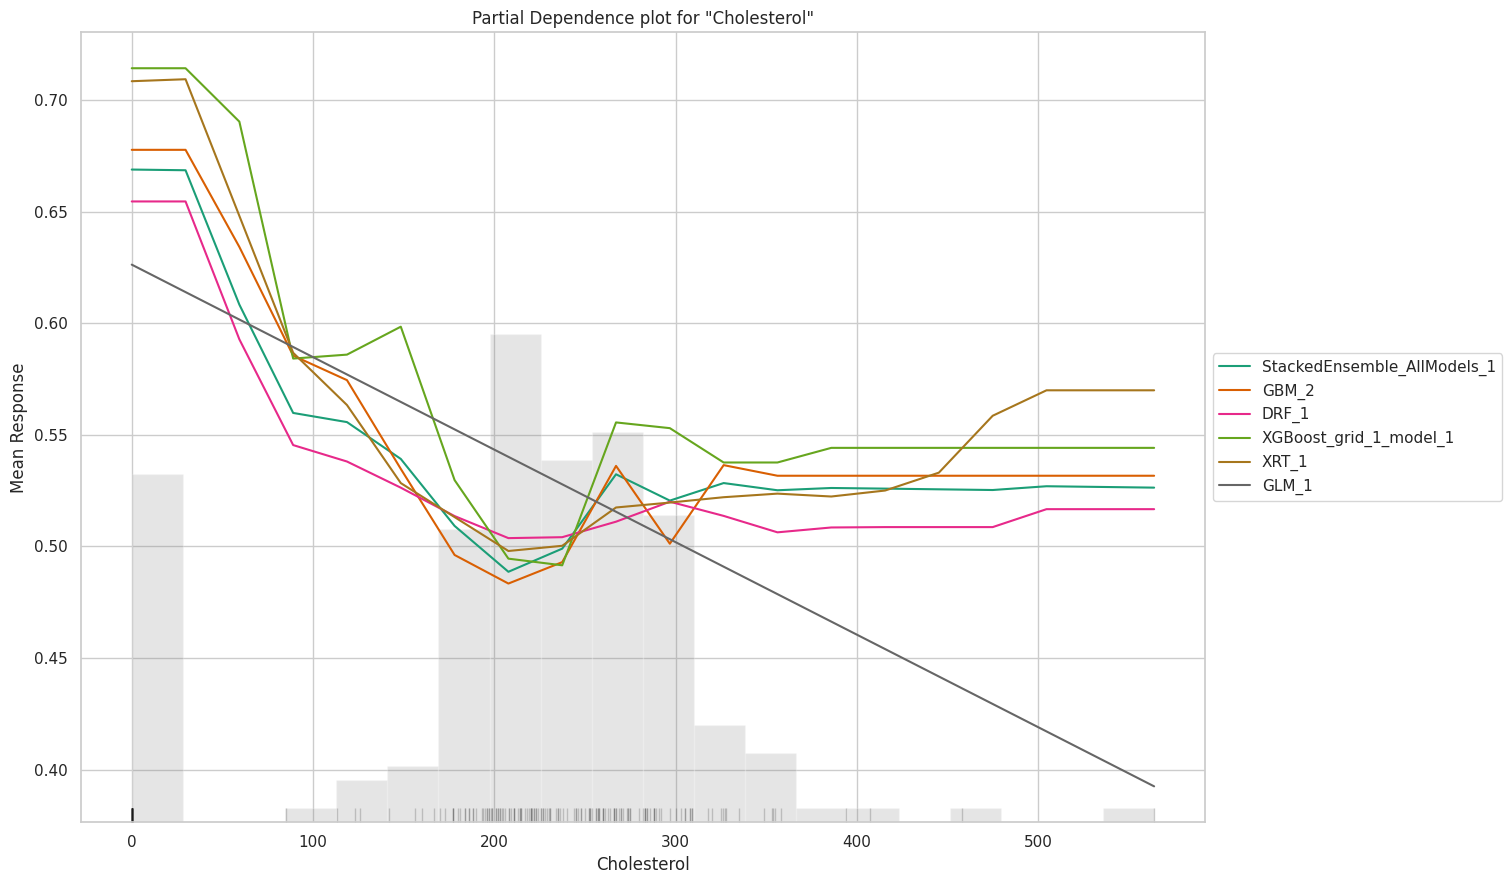

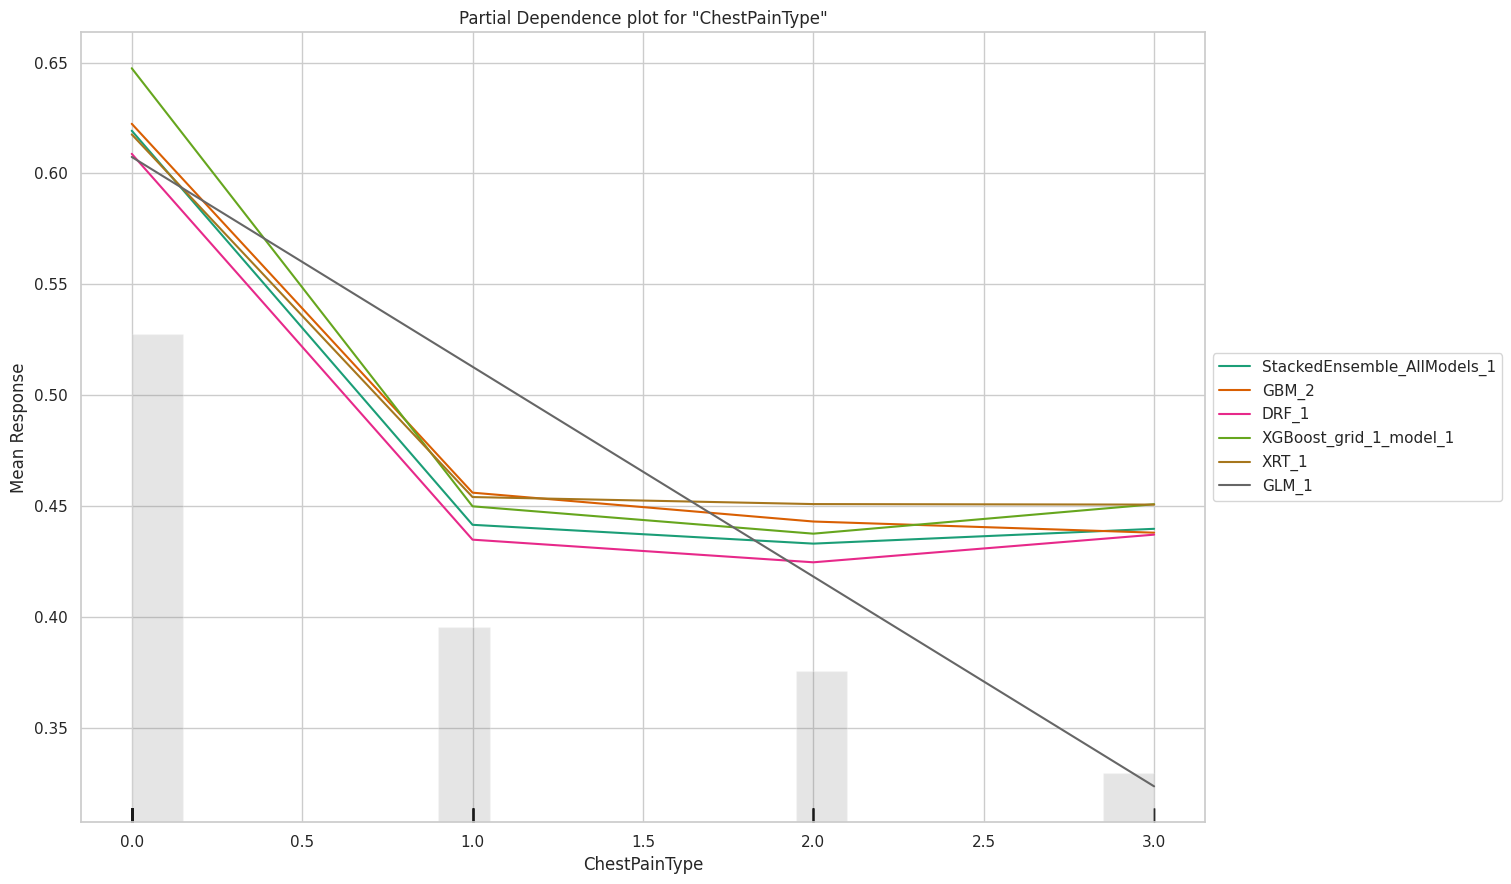

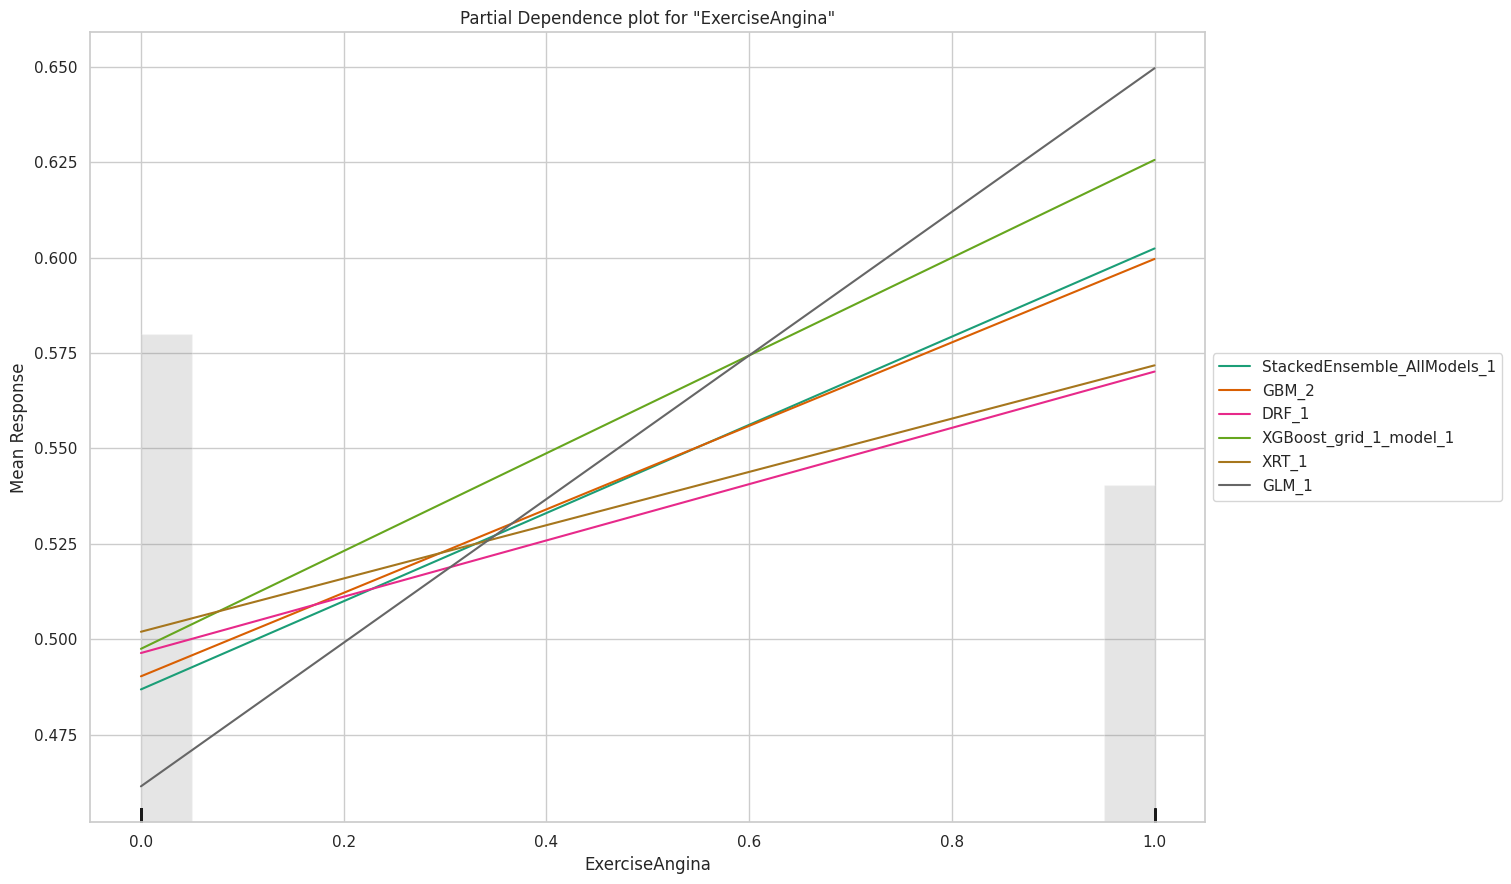

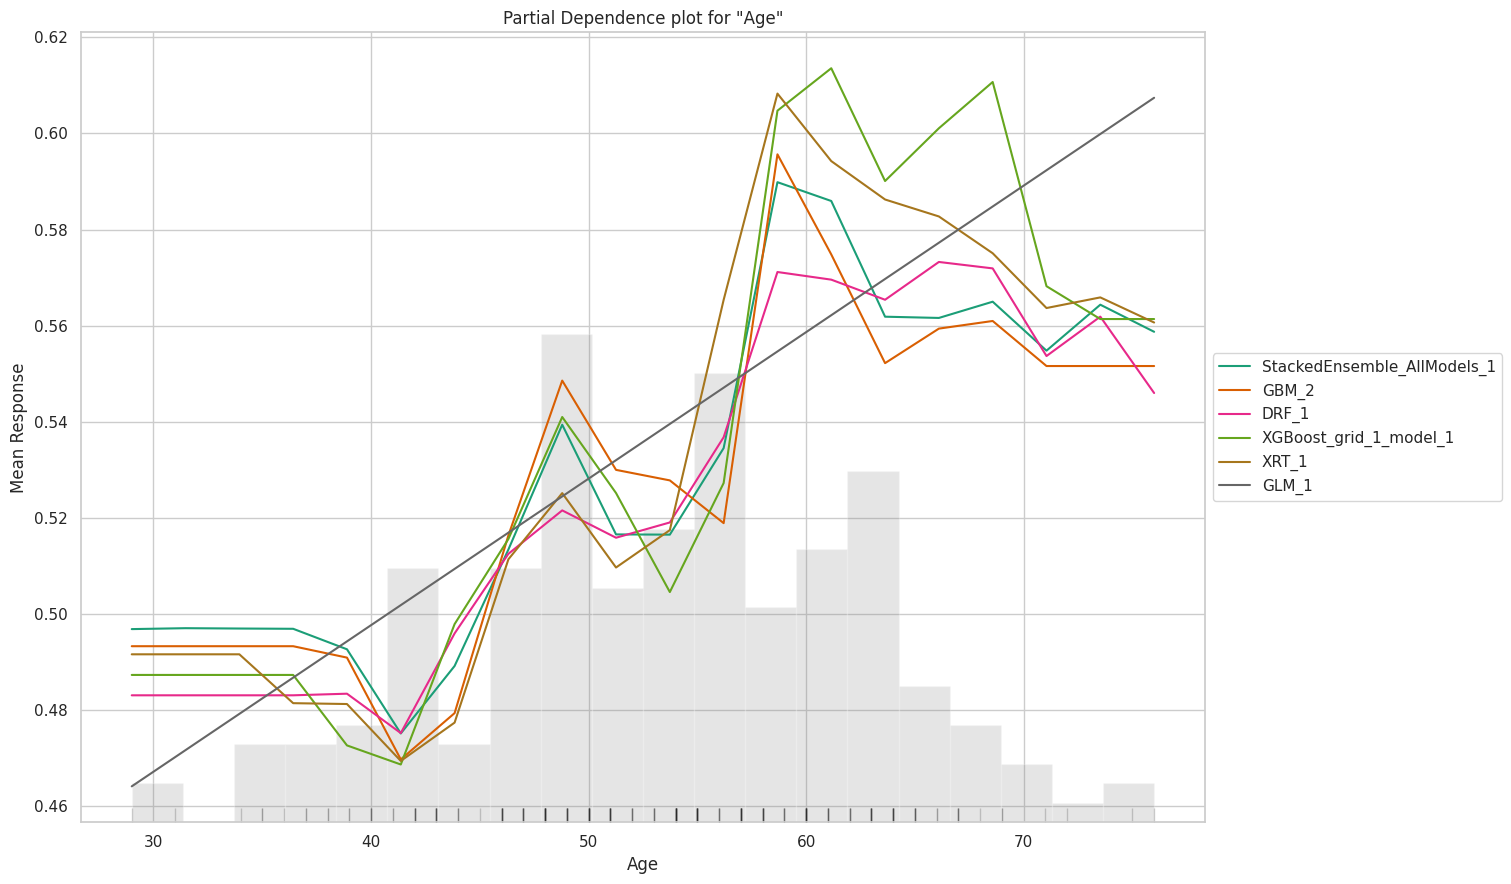

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

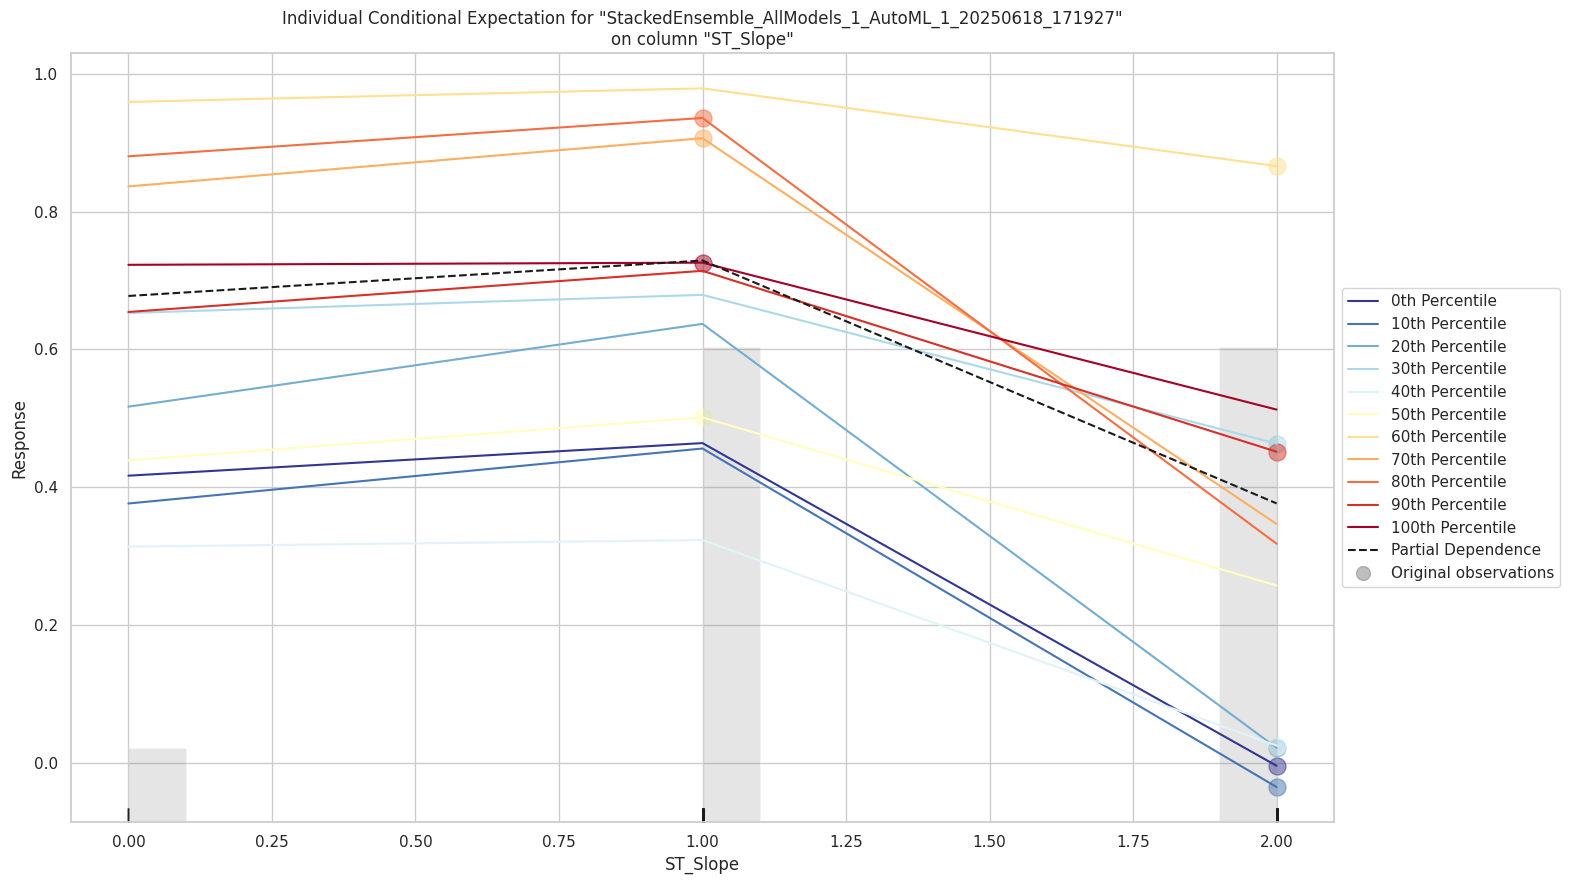

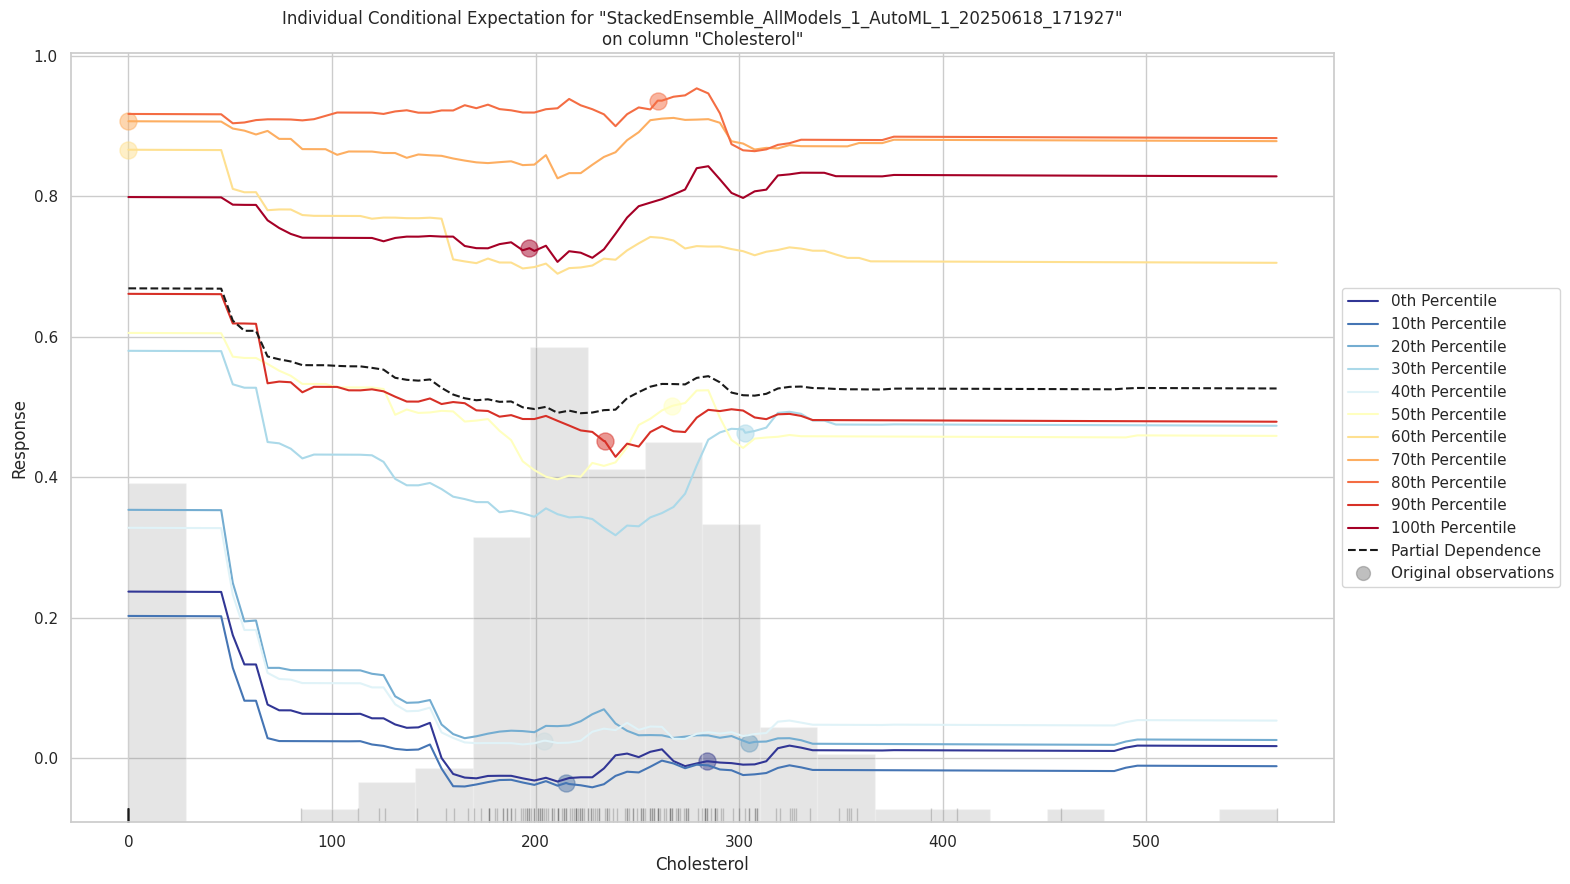

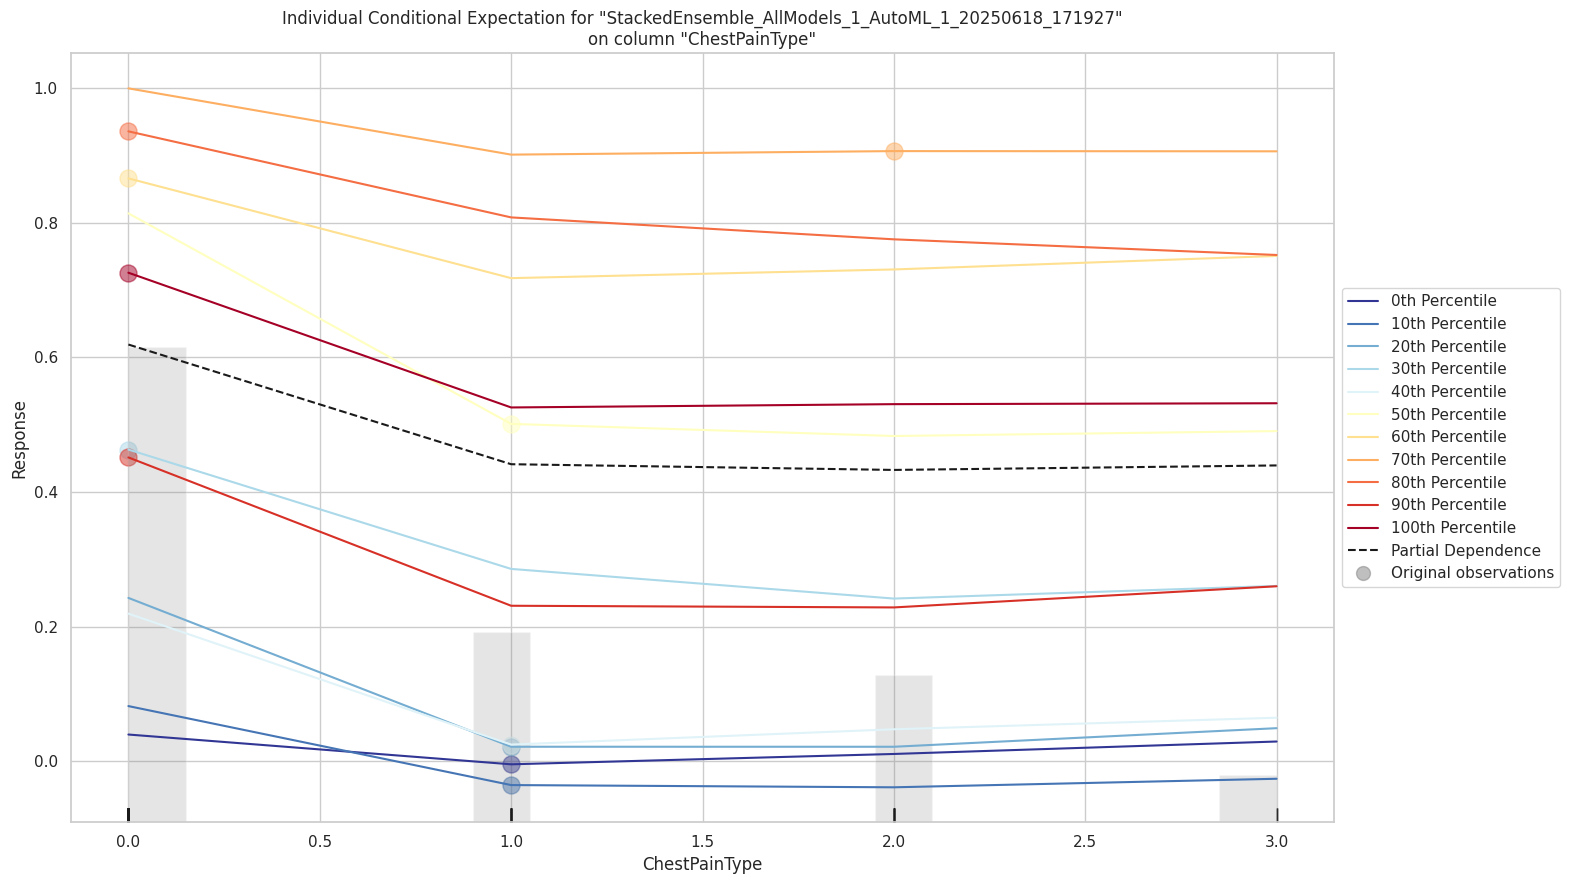

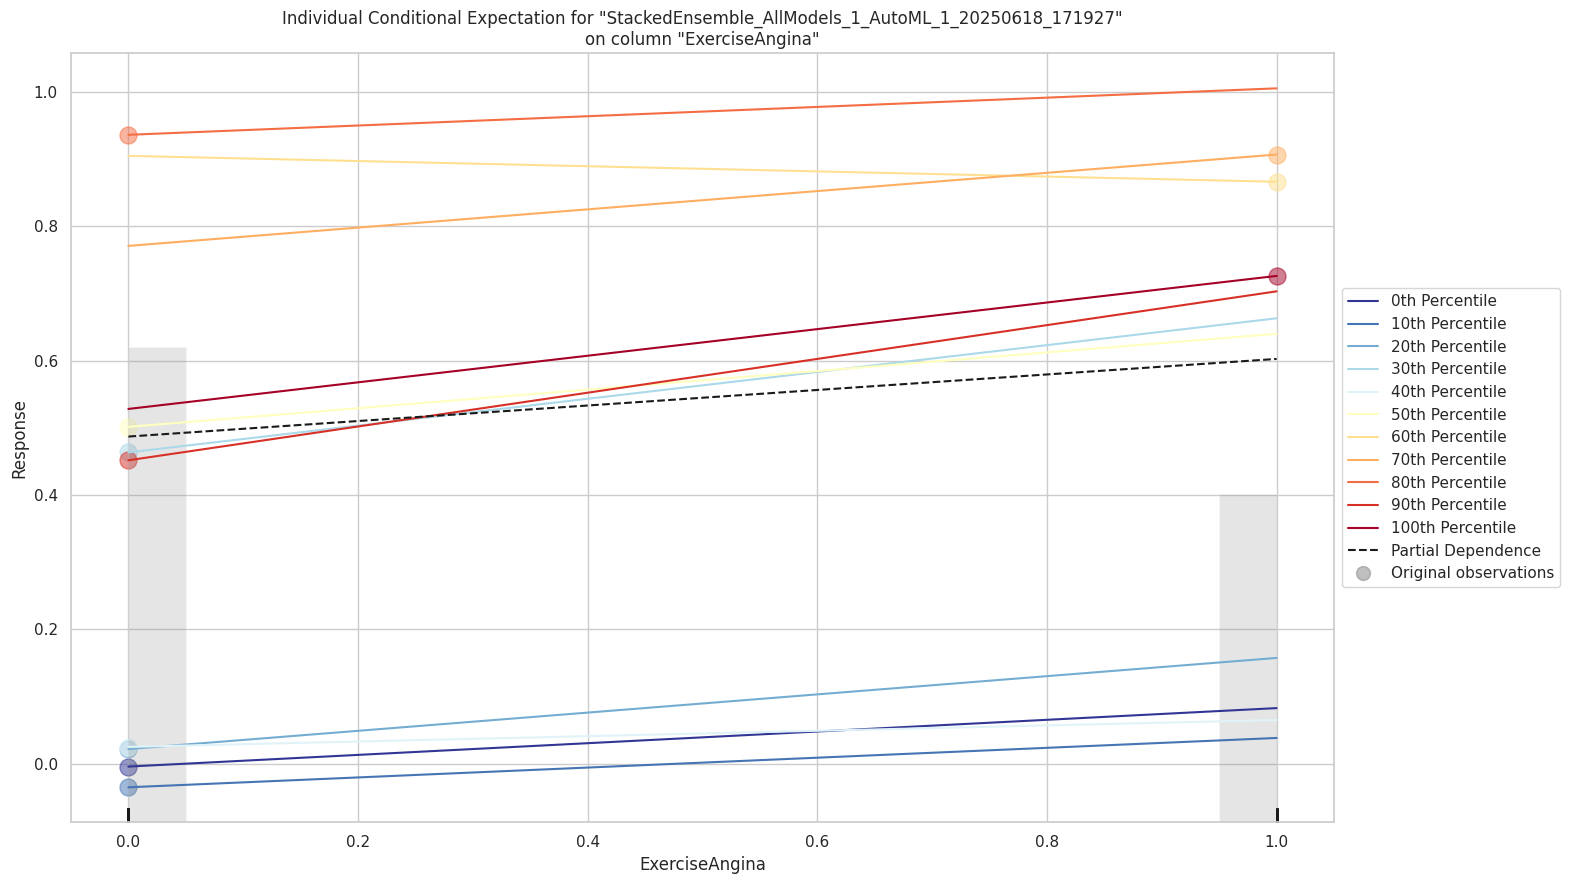

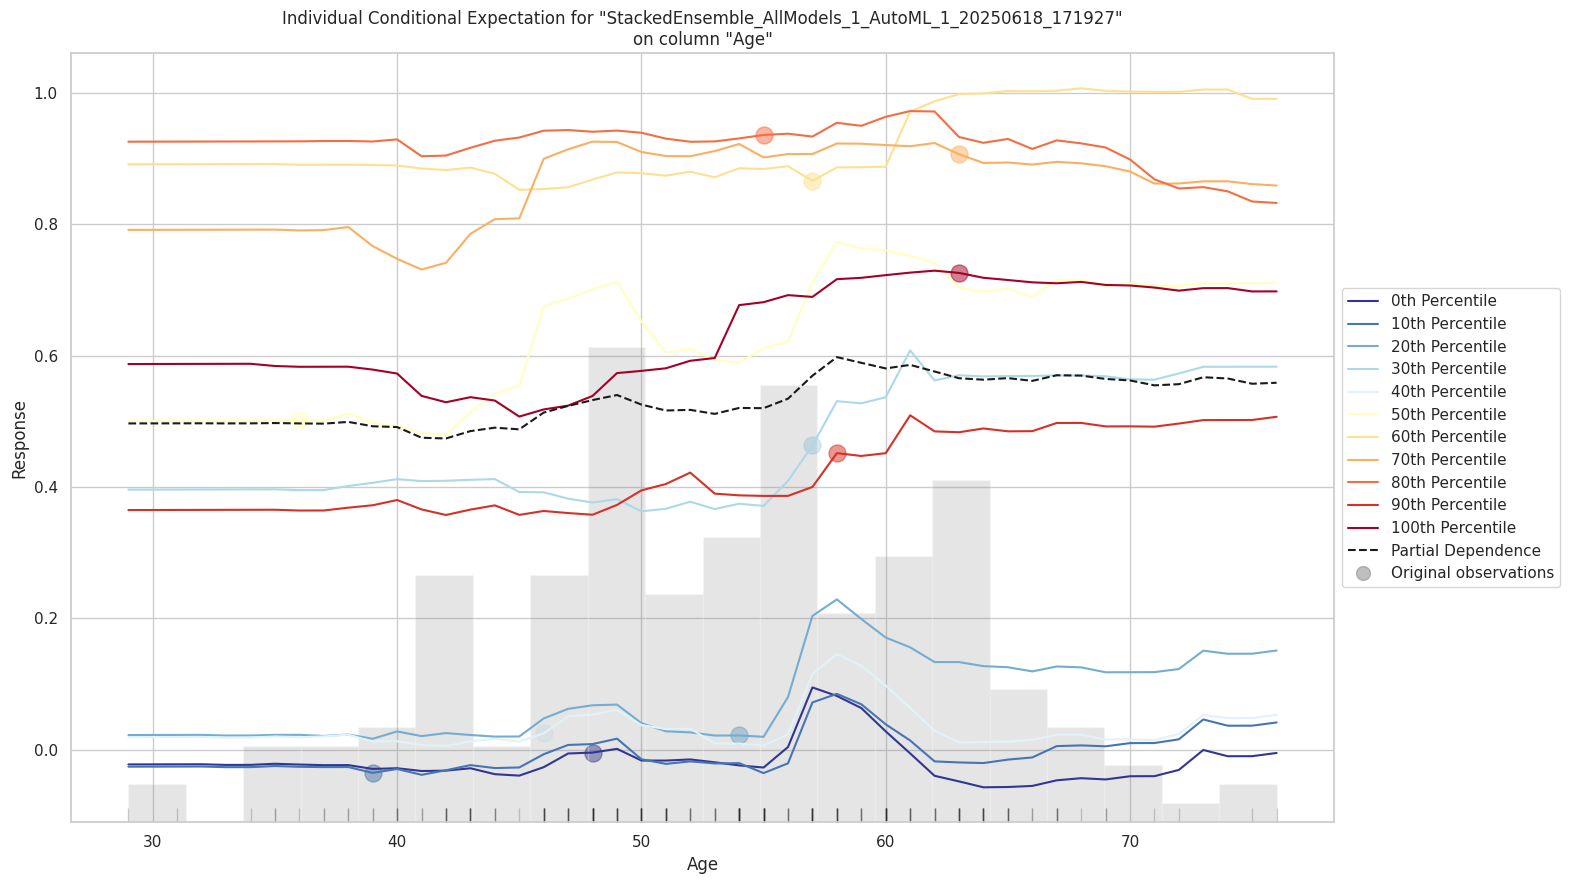

In [43]:

exa = aml.explain(valid)  # Creates visual reports like feature importance, SHAP values, ROC, etc. for the best model


In [44]:
# Evaluate the best model with testing data.
model = aml.leader

In [45]:
!pip install scikit-plot

In [46]:
!pip install scipy==1.9.3



stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%

Testing Results of the trained model: 

Accuracy :  0.861878453038674

Confusion Matrix :
 [[72 16]
 [ 9 84]]

Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.82      0.85        88
           1       0.84      0.90      0.87        93

    accuracy                           0.86       181
   macro avg       0.86      0.86      0.86       181
weighted avg       0.86      0.86      0.86       181



/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


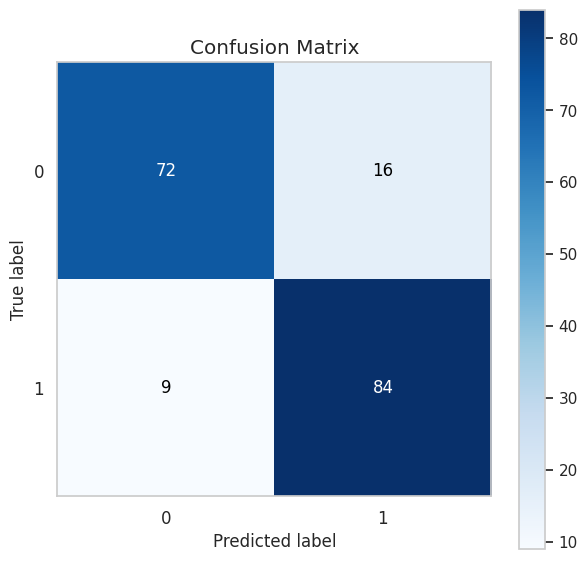

In [47]:
# For Classification
import scikitplot as skplt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Predict with the best model.
predicted_y = model.predict(valid[featureColumns])

predicted_data = predicted_y.as_data_frame()
valid_dataset = valid.as_data_frame()

# Evaluate the skill of the Trained model
acc                 = accuracy_score(valid_dataset[targetColumn], np.round(abs(predicted_data['predict'])))
classReport         = classification_report(valid_dataset[targetColumn], np.round(abs(predicted_data['predict'])))
confMatrix          = confusion_matrix(valid_dataset[targetColumn], np.round(abs(predicted_data['predict'])))

print(); print('Testing Results of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)
# Confusion matrix
skplt.metrics.plot_confusion_matrix(valid_dataset[targetColumn], np.round(abs(predicted_data['predict'])), figsize=(7,7)); plt.show()